In [33]:
import pymysql as mdb
from pprint import pprint as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_pickle('df_steam_db.pkl')
%matplotlib inline

In [45]:
'''fixing timestamps'''
df['price_date_fixed'] = df.price_date.apply(np.array)
df.price_date_fixed = df.price_date_fixed * pow(10,-3)
df.head()

,appid,fprice,iprice,price_date,min_fprice,min_iprice,min_iprice_var,min_iprice_slope,min_iprice_intercept,price_date_fixed
0,2430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,297750,"[39.99, 29.99, 29.99, 19.99, 19.99]","[39.99, 39.99, 39.99, 39.99, 39.99]","[1.417120656e+12, 1.434047268e+12, 1.434994431...","[39.99, 29.99, 29.99, 19.99, 19.99]","[39.99, 39.99, 39.99, 39.99, 39.99]",0.000000e+00,0,39.99,"[1417120656.0, 1434047268.0, 1434994431.0, 144..."
2,19080,"[9.99, 2.49, 2.49]","[9.99, 9.99, 9.99]","[1.417120656e+12, 1.434049315e+12, 1.434996542...","[9.99, 2.49, 2.49]","[9.99, 9.99, 9.99]",0.000000e+00,0,9.99,"[1417120656.0, 1434049315.0, 1434996542.0]"
3,278850,"[4.99, 2.49, 2.49, 2.49, 2.49, 1.49, 1.49]","[4.99, 4.99, 4.99, 4.99, 4.99, 4.99, 4.99]","[1.417120656e+12, 1.417513376e+12, 1.417545207...","[4.99, 2.49, 2.49, 2.49, 2.49, 1.49, 1.49]","[4.99, 4.99, 4.99, 4.99, 4.99, 4.99, 4.99]",7.888609e-31,0,4.99,"[1417120656.0, 1417513376.0, 1417545207.0, 141..."
4,367260,"[5.39, 5.39, 4.01, 4.01, 4.01, 4.01, 4.01, 4.01]","[5.99, 5.99, 5.99, 5.99, 5.99, 5.99, 5.99, 5.99]","[1.430513702e+12, 1.431104712e+12, 1.43404599e...","[5.39, 5.39, 4.01, 4.01, 4.01, 4.01, 4.01, 4.01]","[5.99, 5.99, 5.99, 5.99, 5.99, 5.99, 5.99, 5.99]",7.888609e-31,0,5.99,"[1430513702.0, 1431104712.0, 1434045990.0, 143..."


In [46]:
def get_ists(in_times):
    '''dirty, assumes that each is a sale, which isnt 100% accurate, but close'''
    '''ists: intersaletimes'''
    times = np.array(in_times)
    if not np.array(in_times).size == 1:
        ists = in_times[1:] - in_times[:-1]
    else:
        ists = np.nan
    return ists


In [47]:
df['ists'] = df.price_date_fixed.apply(get_ists)

In [48]:
df['ists_day'] = df.ists / (60*60*24)

In [49]:
df['ists_day_mean'] = df.ists_day.apply(np.mean)

In [50]:
df['ists_day_mean'].mean()

28.310145851134848

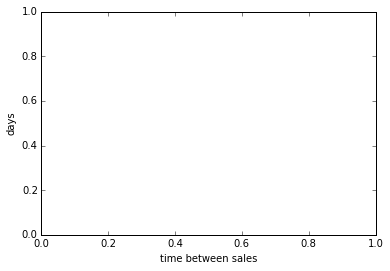

In [52]:
'''make irt list just to see'''
plt.xlabel('time between sales')
plt.ylabel('days')
ist_list = list()
for i in df.ists_day:
    if not type(i) is float:
        ist_list += list(i)

ist_arr = np.array(ist_list)


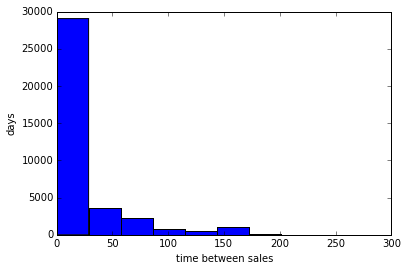

In [53]:
fig,ax = plt.subplots()
# the histogram of the data
n, bins, patches = plt.hist(ist_arr) #x, 50, normed=1, facecolor='green', alpha=0.75)
#plt.yscale('log', nonposy='clip')
# # add a 'best fit' line
# y = mlab.normpdf( bins, mu, sigma)
# l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('time between sales')
plt.ylabel('days')

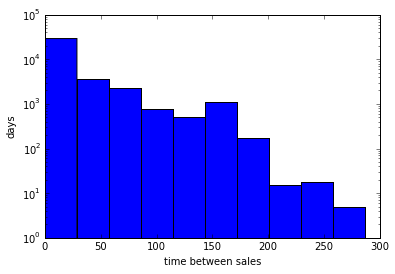

In [54]:
# the histogram of the data
n, bins, patches = plt.hist(ist_arr) #x, 50, normed=1, facecolor='green', alpha=0.75)
plt.yscale('log', nonposy='clip')
# # add a 'best fit' line
# y = mlab.normpdf( bins, mu, sigma)
# l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('time between sales')
plt.ylabel('days')

In [55]:
ist_perserved_list = list()
for i in df.price_date_fixed:
    if not type(i) is float:
        ist_perserved_list.append(np.array(i))

(0, 500)

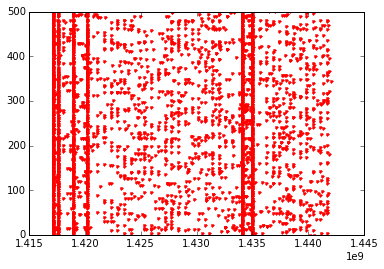

In [63]:
fig,ax = plt.subplots()

#use ist_perserved_list
for i,v in enumerate(ist_perserved_list):
    y =  np.ones(v.shape) * i
    ax.plot(v,y, 'r.')

ax.set_ylim([0,500])

(0, 100)